In [2]:
import pandas as pd
import sqlite3
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# !pip install ipython-sql

In [4]:
# this links helped me.
# https://towardsdatascience.com/jupyter-magics-with-sql-921370099589
# https://community.dataquest.io/t/how-to-connect-to-an-sqlite-database-using-sql-magic-command-and-ipython-sql/492833/3

# https://holypython.com/python-sqlite-tutorial/python-magic-for-sql/

In [5]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

In [6]:
# name = 'Countess'

# %%sql
# select description 
# from character 
# where charname = :name

In [7]:
df = %sql SELECT name FROM sqlite_master WHERE type='table'
df = df.DataFrame()
df

 * sqlite:///chinook.db
Done.


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [8]:
df_albums_artist = %sql select count(Album.Title) as albums_number ,Artist.name as artist from Album inner join Artist\
on Album.ArtistId = Artist.ArtistId group by artist order by albums_number desc limit 10
df_albums_artist = df_albums_artist.DataFrame()
df_albums_artist

 * sqlite:///chinook.db
Done.


,albums_number,artist
0,21,Iron Maiden
1,14,Led Zeppelin
2,11,Deep Purple
3,10,U2
4,10,Metallica
5,6,Ozzy Osbourne
6,5,Pearl Jam
7,4,Various Artists
8,4,Van Halen
9,4,Lost


# Project chinook DB
# Use the arrows to see the visualizations.
## The visualizations have made by Python Seaborn library.

### The 10 artists with the largest albums number are:        
### Iron Maiden, Led Zeppelin, Deep Purple, U2, Metallica, Ozzy Osbourne, Pearl Jam, Van Halen, Lost.

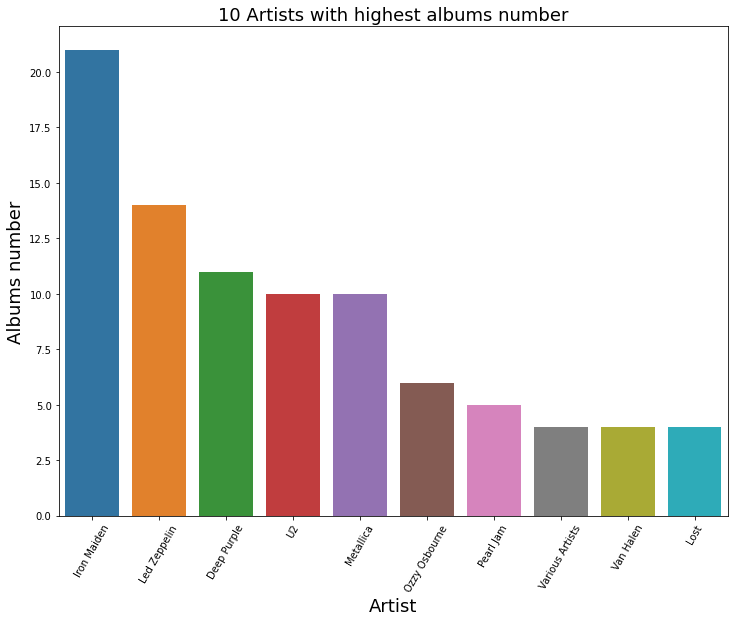

In [19]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.barplot(x=df_albums_artist["artist"],y=df_albums_artist["albums_number"],ax=ax)
_= plt.title('10 Artists with highest albums number',fontsize=18)
_= plt.xticks(rotation=60)
_= plt.ylabel('Albums number', fontsize=18)
_= plt.xlabel('Artist',fontsize=18)

### The 10 genres with the most tracks number are:
### Rock Latin, Metal, Alternative & Punk, Jazz, TV Shows, Blues, Classical, Drama, R&B/Soul

In [10]:
df_track_genre = %sql select count(Track.Name) as tracks_number ,Genre.Name as genre_name from Track inner join Genre on\
Track.GenreId = Genre.GenreId group by Genre.Name order by tracks_number desc limit 10
df_track_genre = df_track_genre.DataFrame()
df_track_genre

 * sqlite:///chinook.db
Done.


,tracks_number,genre_name
0,1297,Rock
1,579,Latin
2,374,Metal
3,332,Alternative & Punk
4,130,Jazz
5,93,TV Shows
6,81,Blues
7,74,Classical
8,64,Drama
9,61,R&B/Soul


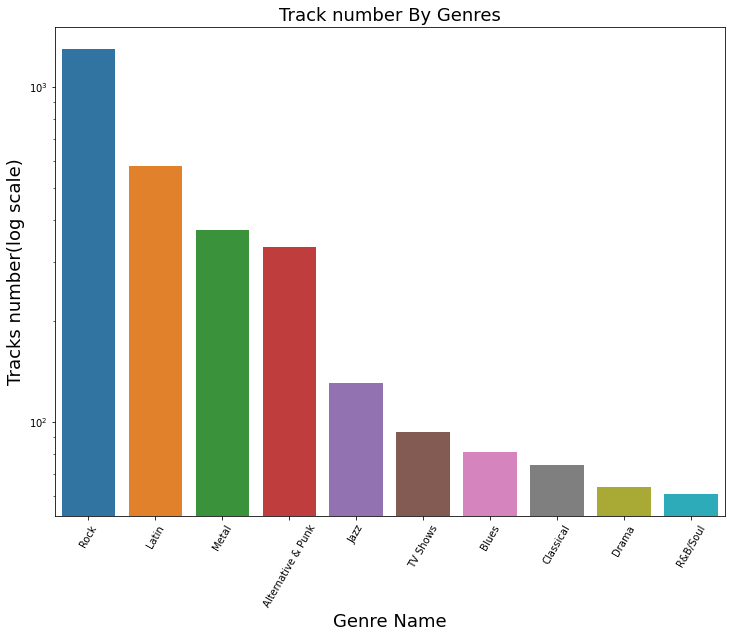

In [11]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.barplot(x=df_track_genre["genre_name"],y=df_track_genre["tracks_number"],ax=ax)
_.set_yscale("log")
_= plt.title('Track number By Genres',fontsize=18)
_= plt.xticks(rotation=60)
_= plt.ylabel('Tracks number(log scale)', fontsize=18)
_= plt.xlabel('Genre Name',fontsize=18)

### There is a correlation between media type and the track length, only in "Protected MPEG-4 video file" which correlated (in general) to long tracks.
### All the other media types are in the same length (in general).

In [12]:
df_mediatype_miliseconds = %sql select MediaType.Name as media_type,Track.Milliseconds from Track \
inner join Genre on Track.GenreId = Genre.GenreId inner join \
MediaType on MediaType.MediaTypeId = Track.MediaTypeId

df_mediatype_miliseconds = df_mediatype_miliseconds.DataFrame()
df_mediatype_miliseconds


 * sqlite:///chinook.db
Done.


,media_type,Milliseconds
0,MPEG audio file,343719
1,Protected AAC audio file,342562
2,Protected AAC audio file,230619
3,Protected AAC audio file,252051
4,Protected AAC audio file,375418
...,...,...
3498,Protected AAC audio file,286741
3499,Protected AAC audio file,139200
3500,Protected AAC audio file,66639
3501,Protected AAC audio file,221331


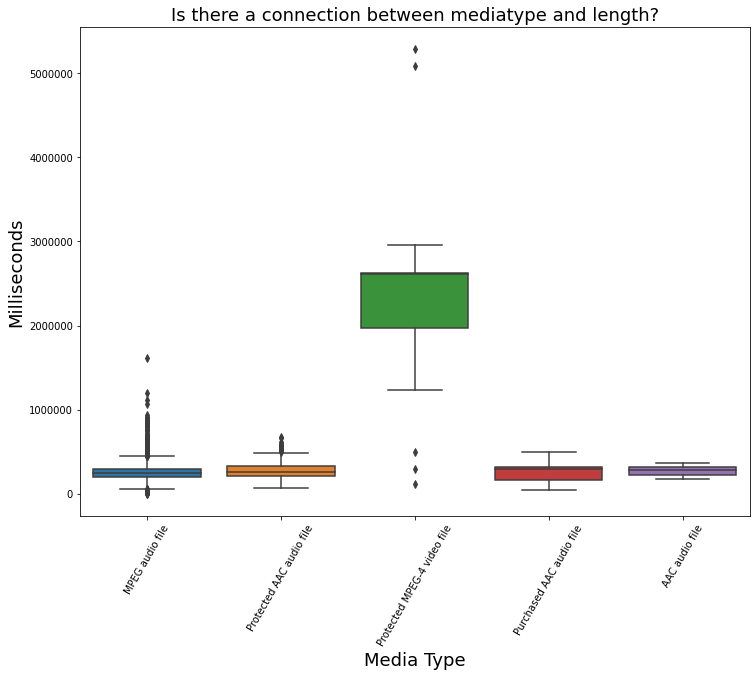

In [13]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.boxplot(x=df_mediatype_miliseconds["media_type"],y=df_mediatype_miliseconds["Milliseconds"],ax=ax);
_= plt.title('Is there a connection between mediatype and length?',fontsize=18)
_= plt.xticks(rotation=60)
plt.ticklabel_format(style='plain', axis='y')
_= plt.ylabel('Milliseconds', fontsize=18)
_= plt.xlabel('Media Type',fontsize=18)

### The playlists with the largest tracks number are:
### Music, 90’s Music, TV Shows,Classical, Brazilian Music, Heavy Metal Classic, Classical 101, Grunge, On-The-Go, Music Videos.

In [14]:
df_playlist_tracks_number =  %sql select Playlist.Name as playlist_name ,count(*) \
as tracks_number from Track inner join PlaylistTrack on PlaylistTrack.TrackId = Track.TrackId \
inner join Playlist on Playlist.PlaylistId = PlaylistTrack.PlaylistId group by Playlist.Name order by tracks_number desc
df_playlist_tracks_number = df_playlist_tracks_number.DataFrame()
df_playlist_tracks_number

 * sqlite:///chinook.db
Done.


,playlist_name,tracks_number
0,Music,6580
1,90’s Music,1477
2,TV Shows,426
3,Classical,75
4,Brazilian Music,39
5,Heavy Metal Classic,26
6,Classical 101 - The Basics,25
7,Classical 101 - Next Steps,25
8,Classical 101 - Deep Cuts,25
9,Grunge,15


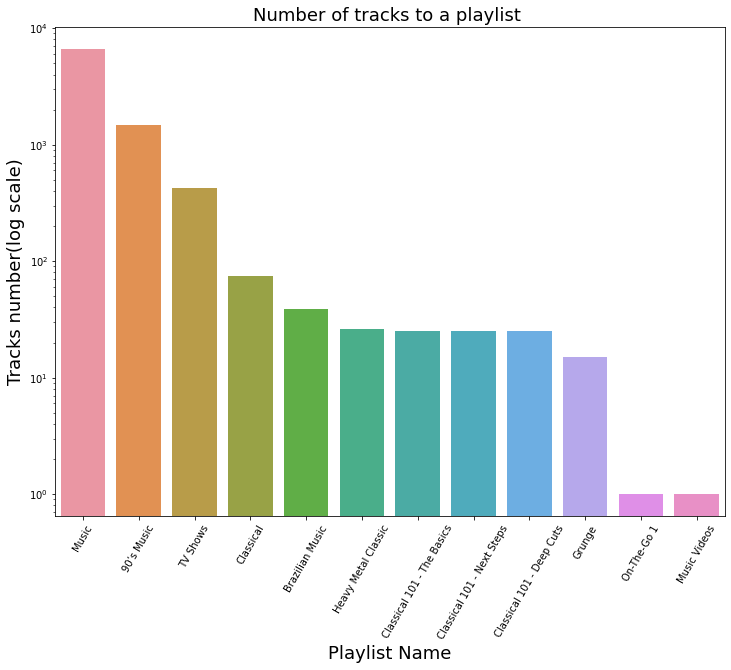

In [15]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.barplot(x=df_playlist_tracks_number["playlist_name"],y=df_playlist_tracks_number["tracks_number"],ax=ax);
_.set_yscale("log")
_= plt.title('Number of tracks to a playlist ',fontsize=18)
_= plt.xticks(rotation=60)
_= plt.ylabel('Tracks number(log scale)', fontsize=18)
_= plt.xlabel('Playlist Name',fontsize=18)

### The most of the tracks are composed from only two playlists. 
### more playlist in the track --> less tracks. 
### there is a "pick" in the frequency of tracks with 12 playlists.

In [16]:
df_track_playlist_number =  %sql select Track.Name as track_name ,count(*) as number_of_playlists from Track \
inner join PlaylistTrack on PlaylistTrack.TrackId = Track.TrackId \
inner join Playlist on Playlist.PlaylistId = PlaylistTrack.PlaylistId \
group by Track.Name
df_track_playlist_number = df_track_playlist_number.DataFrame()
df_track_playlist_number

 * sqlite:///chinook.db
Done.


,track_name,number_of_playlists
0,"""40""",2
1,"""?""",2
2,"""Eine Kleine Nachtmusik"" Serenade In G, K. 525...",4
3,#1 Zero,2
4,#9 Dream,2
...,...,...
3252,É que Nessa Encarnação Eu Nasci Manga,2
3253,"Étude 1, In C Major - Preludio (Presto) - Liszt",4
3254,Óculos,2
3255,Óia Eu Aqui De Novo,2


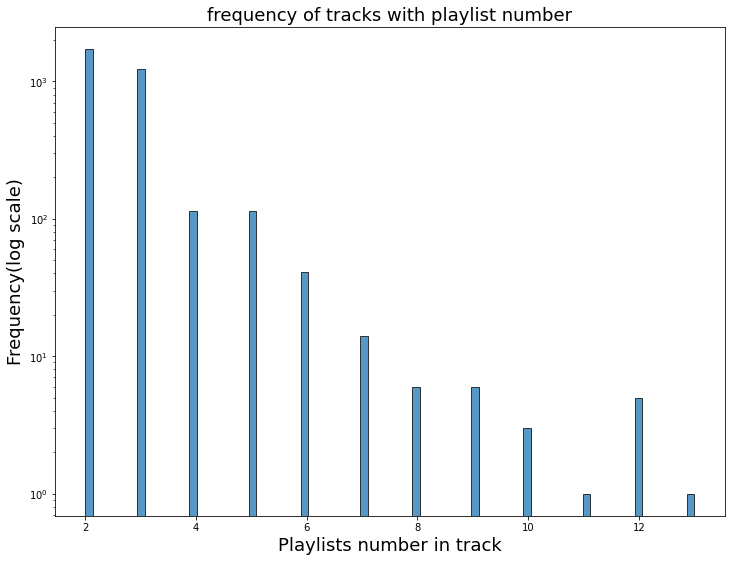

In [18]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.histplot(x=df_track_playlist_number["number_of_playlists"],ax=ax);
_.set_yscale("log")
_= plt.title('frequency of tracks with playlist number',fontsize=18)
a = plt.ylabel('Frequency(log scale)', fontsize=18)
b = plt.xlabel('Playlists number in track',fontsize=18)

### The most sold track in USA is "Heaven Can Wait" with the value of 3. 

In [25]:
df_10_most_tracks_usa = %sql \
select Track.Name as track_name,count(name) as number from InvoiceLine \
inner join Invoice on InvoiceLine.InvoiceId = Invoice.InvoiceId \
inner join Track on Track.TrackId = InvoiceLine.TrackId \
where BillingCountry="USA" \
group by name order by number desc limit 10
df_10_most_tracks_usa = df_10_most_tracks_usa.DataFrame()
df_10_most_tracks_usa

 * sqlite:///chinook.db
Done.


,track_name,number
0,Heaven Can Wait,3
1,Train In Vain,2
2,Sun King,2
3,Speed Of Light,2
4,Rehab,2
5,Peace On Earth,2
6,Música No Ar,2
7,Meditação,2
8,Gay Witch Hunt,2
9,Branch Closing,2


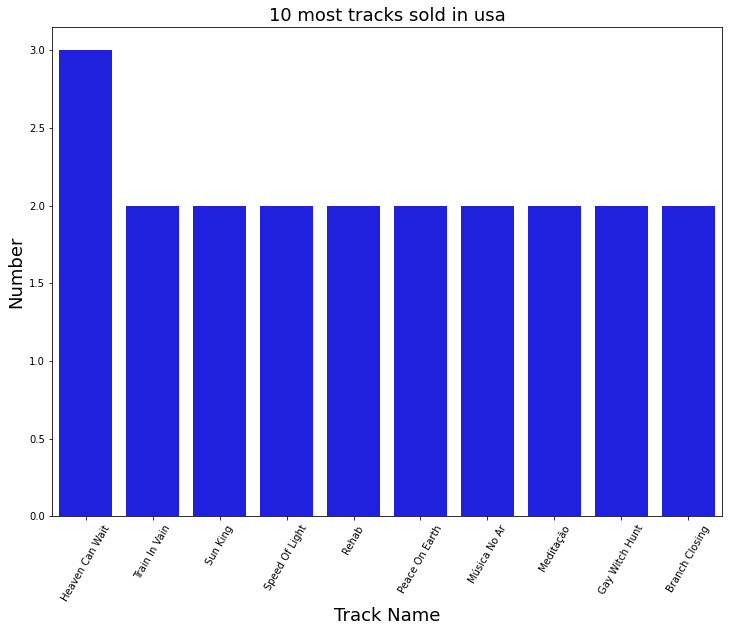

In [27]:
f, ax  = plt.subplots(1,1, figsize = (12,9))
_= sns.barplot(x=df_10_most_tracks_usa["track_name"],y=df_10_most_tracks_usa["number"],ax=ax,color="blue");
_= plt.title('10 most tracks sold in usa',fontsize=18)
_= plt.xticks(rotation=60)
_= plt.ylabel('Number', fontsize=18)
_= plt.xlabel('Track Name',fontsize=18)